# Ingredient Database Explorer

This notebook provides a comprehensive walkthrough of the ingredient database for data analysts.

## Database Schema Overview

The database contains the following tables:

1. **`ingredient`** - Ingredients from OpenFoodFacts taxonomy
2. **`allergen`** - Allergen taxonomy 
3. **`ingredient_allergen`** - Many-to-many relationship between ingredients and allergens
4. **`product`** - Product information
5. **`product_ingredient`** - Many-to-many relationship between products and ingredients
6. **`product_allergen`** - Product-allergen relationships for fast lookups

Let's explore each table and see how they relate to each other!


## Setup: Import Libraries and Connect to Database


In [1]:
# Import required libraries
import sqlite3
import pandas as pd
import numpy as np
from pathlib import Path

# For visualizations (optional - install if needed)
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style('whitegrid')
    HAS_VIZ = True
except ImportError:
    print("Matplotlib/Seaborn not installed. Visualizations will be skipped.")
    print("To install: pip install matplotlib seaborn")
    HAS_VIZ = False

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")


/var/folders/s_/nn0tqk3548d9xbrc07r8f4_r0000gn/T/ipykernel_42794/1911465806.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


✅ Libraries imported successfully!


In [2]:
# Connect to the SQLite database
db_path = Path('ingredient_api.db')

if not db_path.exists():
    print(f"⚠️  Database not found at {db_path}")
    print("Please ensure the database exists and you've imported data.")
else:
    print(f"✅ Database found at {db_path}")

# Create connection
conn = sqlite3.connect(db_path)
print("\n✅ Connected to database successfully!")


✅ Database found at ingredient_api.db

✅ Connected to database successfully!


## 1. Explore the Ingredient Table

The `ingredient` table contains the core ingredient taxonomy from OpenFoodFacts.


In [3]:
# Get total count of ingredients
ingredient_count = pd.read_sql_query(
    "SELECT COUNT(*) as total_ingredients FROM ingredient",
    conn
)
print(f"Total Ingredients: {ingredient_count['total_ingredients'][0]:,}")

# View first few ingredients
ingredients_sample = pd.read_sql_query(
    """
    SELECT *
    FROM ingredient
    LIMIT 20
    """,
    conn
)

print("\n📊 Sample Ingredients:")
ingredients_sample


Total Ingredients: 536,496

📊 Sample Ingredients:


,id,code,name,parent_code,allergen_code,source,last_updated
0,1,en:2,2,None,None,off,2025-10-08 07:34:18
1,2,en:3,3,None,None,off,2025-10-08 07:34:18
2,3,en:3-pks,3 Pks,None,None,off,2025-10-08 07:34:18
3,4,en:40-grain,40 Grain,None,None,off,2025-10-08 07:34:18
4,5,en:6,6,None,None,off,2025-10-08 07:34:18
5,6,en:6-pks,6 Pks,None,None,off,2025-10-08 07:34:18
6,7,en:a,A,None,None,off,2025-10-08 07:34:18
7,8,en:acai-berry,Acai Berry,None,None,off,2025-10-08 07:34:18
8,9,en:acerola,Acerola,None,None,off,2025-10-08 07:34:18
9,10,en:aceto-balsamico-di-modena-igp,Aceto Balsamico Di Modena Igp,None,None,off,2025-10-08 07:34:18


In [4]:
# Explore ingredient sources
source_distribution = pd.read_sql_query(
    """
    SELECT source, COUNT(*) as count
    FROM ingredient
    GROUP BY source
    ORDER BY count DESC
    """,
    conn
)

print("📊 Ingredients by Source:")
source_distribution


📊 Ingredients by Source:


,source,count
0,off,536496


In [5]:
# Search for specific ingredients (e.g., containing 'milk')
search_term = 'milk'
milk_ingredients = pd.read_sql_query(
    f"""
    SELECT id, code, name, parent_code
    FROM ingredient
    WHERE name LIKE '%{search_term}%'
    LIMIT 20
    """,
    conn
)

print(f"\n🔍 Ingredients containing '{search_term}':")
milk_ingredients



🔍 Ingredients containing 'milk':


,id,code,name,parent_code
0,166,en:buttermilk,Buttermilk,None
1,167,en:buttermilk-powder,Buttermilk Powder,None
2,168,en:buttermilk-solids,Buttermilk Solids,None
3,192,en:canola-oil-milk-protein-concentrate,Canola Oil Milk Protein Concentrate,None
4,272,en:cocoa-butter-milk,Cocoa Butter Milk,None
5,308,en:condensed-milk,Condensed Milk,None
6,339,en:cow-s-milk,Cow S Milk,None
7,355,en:cultured-buttermilk,Cultured Buttermilk,None
8,357,en:cultured-pasteurized-milk,Cultured Pasteurized Milk,None
9,358,en:cultured-skim-milk,Cultured Skim Milk,None


## 2. Explore the Allergen Table

The `allergen` table contains allergen information from OpenFoodFacts.


In [7]:
# Get total count of allergens
allergen_count = pd.read_sql_query(
    "SELECT COUNT(*) as total_allergens FROM allergen",
    conn
)
print(f"Total Allergens: {allergen_count['total_allergens'][0]:,}")

# View all allergens
allergens = pd.read_sql_query(
    """
    SELECT id, code, name, category, severity_level
    FROM allergen
    ORDER BY name
    """,
    conn
)

print("\n📊 All Allergens:")
allergens


Total Allergens: 1,278

📊 All Allergens:


,id,code,name,category,severity_level
0,22,en:1,1,None,None
1,23,en:a,A,None,None
2,24,en:agg,Agg,None,None
3,25,en:alaska-seelachsfilet,Alaska Seelachsfilet,None,None
4,26,en:albumin,Albumin,None,None
...,...,...,...,...,...
1273,1274,en:食塩,食塩,None,None
1274,1275,en:鶏-肉,鶏 肉,None,None
1275,1276,en:鶏卵,鶏卵,None,None
1276,1277,en:鶏肉,鶏肉,None,None


## 3. Ingredient-Allergen Relationships (JOIN Example)

The `ingredient_allergen` table links ingredients to their allergens. Let's explore this relationship!


In [11]:
# Count of ingredient-allergen relationships
relationship_count = pd.read_sql_query(
    "SELECT COUNT(*) as total_relationships FROM ingredient_allergen",
    conn
)
print(f"Total Ingredient-Allergen Relationships: {relationship_count['total_relationships'][0]:,}")


Total Ingredient-Allergen Relationships: 0


In [33]:
# 🔗 JOIN Example: Get ingredients with their allergen names
ingredients_with_allergens = pd.read_sql_query(
    """
    SELECT 
        i.name as ingredient_name,
        a.name as allergen_name,
        ia.certainty,
        ia.source
    FROM ingredient_allergen ia
    JOIN ingredient i ON ia.ingredient_id = i.id
    JOIN allergen a ON ia.allergen_id = a.id
    LIMIT 30
    """,
    conn
)

print("\n🔗 Ingredients with their Allergens (JOIN Example):")
ingredients_with_allergens



🔗 Ingredients with their Allergens (JOIN Example):


,ingredient_name,allergen_name,certainty,source


## 4. Explore Products

The `product` table contains product information from OpenFoodFacts.


In [7]:
# Get total count of products
product_count = pd.read_sql_query(
    "SELECT COUNT(*) as total_products FROM product",
    conn
)
print(f"Total Products: {product_count['total_products'][0]:,}")

# Sample products
products_sample = pd.read_sql_query(
    """
    SELECT *
    FROM product
    LIMIT 10
    """,
    conn
)

print("\n📊 Sample Products:")
products_sample


Total Products: 1,000

📊 Sample Products:


,id,barcode,name,brand,lang,created_at,nutriscore_grade,nutriscore_score,quantity_raw,quantity_amount,quantity_unit,categories_text,has_allergens,has_traces,has_ingredients,has_nutrition,is_complete,allergen_data_incomplete
0,1,0000101209159,Véritable pâte à tartiner noisettes chocolat noir,Bovetti,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
1,2,0000105000011,Chamomile Herbal Tea,Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
2,3,0000105000042,"Lagg's, herbal tea, peppermint",Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
3,4,0000105000059,Linden Flowers Tea,Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
4,5,0000105000073,"Herbal Tea, Hibiscus",Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
5,6,0000105000196,Apple & Cinnamon Tea,Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
6,7,0000105000219,Green Tea,Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
7,8,0000105000318,Shave Grass Herbal Tea,Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
8,9,0000105000356,"Lagg's, herbal tea, chamomile * mint",Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0
9,10,0000105000363,Artichoke Herbal Tea,Lagg's,en,2025-10-08 07:34:18,None,None,None,None,None,None,0,0,0,0,0,0


In [14]:
# Top brands by product count
top_brands = pd.read_sql_query(
    """
    SELECT 
        COALESCE(brand, 'Unknown') as brand,
        COUNT(*) as product_count
    FROM product
    GROUP BY brand
    ORDER BY product_count DESC
    LIMIT 15
    """,
    conn
)

print("\n📊 Top 15 Brands by Product Count:")
top_brands



📊 Top 15 Brands by Product Count:


,brand,product_count
0,"Lindt, Lindt & Sprungli (Schweiz) Ag",80
1,Mt. Olive,74
2,,67
3,"Tic Tac, Ferrero U.S.A. Incorporated",33
4,Long Grove Confectionery Co.,27
5,Lindt,24
6,Lindt & Sprungli (Schweiz) Ag,22
7,"Welch's, Healthy Food Brands Llc",18
8,"Ferrero Collection, Ferrero U.S.A. Incorporated",18
9,Mt. Olive Pickle Company Inc.,16


## 5. Product-Ingredient Relationships (Multi-table JOIN)

The `product_ingredient` table links products to their ingredients. This is where it gets interesting!


In [8]:
# 🔗 JOIN: Get products with their ingredients
products_with_ingredients = pd.read_sql_query(
    """
    SELECT percent_estimate, COUNT(DISTINCT product_id) as products
    FROM product_ingredient pi
    GROUP BY 1
    ORDER BY 2
    LIMIT 40
    """,
    conn
)

print("\n🔗 Products with their Ingredients (JOIN Example):")
products_with_ingredients


🔗 Products with their Ingredients (JOIN Example):


,percent_estimate,products
0,None,882


In [6]:
# 🔗 JOIN: Get products with their ingredients
products_with_ingredients = pd.read_sql_query(
    """
    SELECT 
        p.name as product_name,
        p.brand,
        i.name as ingredient_name,
        pi.rank,
        pi.percent_estimate
    FROM product_ingredient pi
    JOIN product p ON pi.product_id = p.id
    JOIN ingredient i ON pi.ingredient_id = i.id
    ORDER BY p.id, pi.rank
    LIMIT 40
    """,
    conn
)

print("\n🔗 Products with their Ingredients (JOIN Example):")
products_with_ingredients



🔗 Products with their Ingredients (JOIN Example):


,product_name,brand,ingredient_name,rank,percent_estimate
0,Chamomile Herbal Tea,Lagg's,Camomile Flower,1,None
1,Chamomile Herbal Tea,Lagg's,Herb,2,None
2,Chamomile Herbal Tea,Lagg's,Camomile,3,None
3,"Lagg's, herbal tea, peppermint",Lagg's,Peppermint,1,None
4,"Lagg's, herbal tea, peppermint",Lagg's,Herb,2,None
5,"Lagg's, herbal tea, peppermint",Lagg's,Mint,3,None
6,Linden Flowers Tea,Lagg's,Linden Flowers,1,None
7,"Herbal Tea, Hibiscus",Lagg's,Roselle Flower,1,None
8,"Herbal Tea, Hibiscus",Lagg's,Plant,2,None
9,Apple & Cinnamon Tea,Lagg's,Tea,1,None


In [16]:
# Most common ingredients across all products
common_ingredients = pd.read_sql_query(
    """
    SELECT 
        i.name as ingredient_name,
        COUNT(DISTINCT pi.product_id) as product_count
    FROM product_ingredient pi
    JOIN ingredient i ON pi.ingredient_id = i.id
    GROUP BY i.id, i.name
    ORDER BY product_count DESC
    LIMIT 20
    """,
    conn
)

print("\n📊 Top 20 Most Common Ingredients Across Products:")
common_ingredients



📊 Top 20 Most Common Ingredients Across Products:


,ingredient_name,product_count
0,Added Sugar,578
1,Disaccharide,548
2,Sugar,511
3,Oil And Fat,250
4,Chocolate,231
5,Cocoa Butter,220
6,Plant,197
7,Vegetable Oil And Fat,196
8,Vegetable Oil,172
9,Cocoa,171


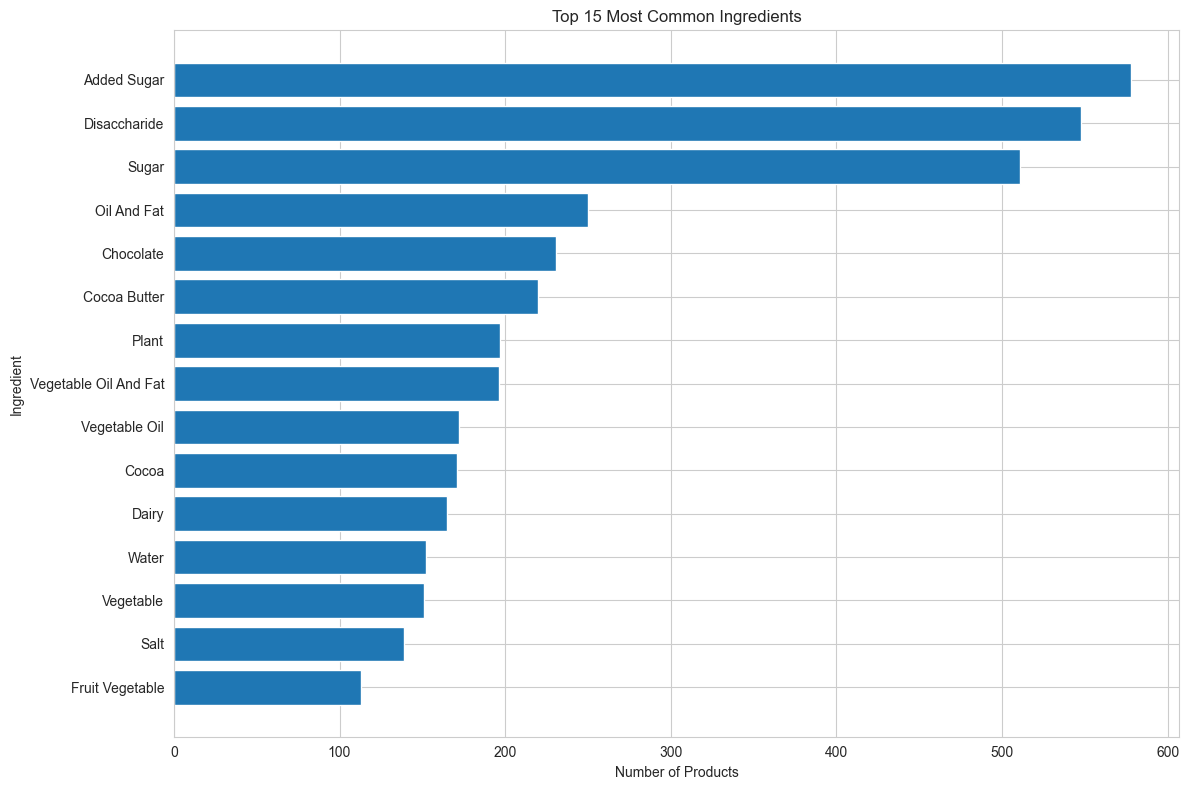

In [17]:
# Visualize most common ingredients
if HAS_VIZ and len(common_ingredients) > 0:
    plt.figure(figsize=(12, 8))
    plt.barh(common_ingredients['ingredient_name'][:15], 
             common_ingredients['product_count'][:15])
    plt.xlabel('Number of Products')
    plt.ylabel('Ingredient')
    plt.title('Top 15 Most Common Ingredients')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("Visualization skipped (matplotlib not available or no data)")


## 6. Product-Allergen Relationships

The `product_allergen` table provides denormalized allergen information for products.


In [9]:
products_with_allergens = pd.read_sql_query(
    f"""
    SELECT *
    FROM product_allergen pa
    """,
    conn
)

print("\n🔗 Products with Allergen Information (JOIN Example):")
products_with_allergens


🔗 Products with Allergen Information (JOIN Example):


,id,product_id,allergen_id,relation_type,source
0,1,1,13,contains,off
1,2,15,11,contains,off
2,3,15,20,contains,off
3,4,16,11,contains,off
4,5,16,20,contains,off
...,...,...,...,...,...
1420,1421,992,11,contains,off
1421,1422,994,20,contains,off
1422,1423,995,15,contains,off
1423,1424,996,15,contains,off


In [26]:
# 🔗 JOIN: Products with allergen warnings
search_term = 'milk'

products_with_allergens = pd.read_sql_query(
    f"""
    SELECT 
        p.name as product_name,
        p.brand,
        a.name as allergen_name,
        pa.relation_type
    FROM product_allergen pa
    JOIN product p ON pa.product_id = p.id
    JOIN allergen a ON pa.allergen_id = a.id
    WHERE product_name LIKE '%{search_term}%'
    LIMIT 30
    """,
    conn
)

print("\n🔗 Products with Allergen Information (JOIN Example):")
products_with_allergens



🔗 Products with Allergen Information (JOIN Example):


,product_name,brand,allergen_name,relation_type
0,"Mcvitie's, mini gingerbread men, milk chocolate",Mcvitie's,Gluten,contains
1,"Mcvitie's, mini gingerbread men, milk chocolate",Mcvitie's,Milk,contains
2,"Mcvitie's, mini gingerbread men, milk chocolate",Mcvitie's,Soybeans,contains
3,"Rum Trauben Nuss, Milk Chocolate Wih Rum Raisins & Nuts",Ritter Sport,Milk,contains
4,"Rum Trauben Nuss, Milk Chocolate Wih Rum Raisins & Nuts",Ritter Sport,Nuts,contains
5,"Rum Trauben Nuss, Milk Chocolate Wih Rum Raisins & Nuts",Ritter Sport,Soybeans,contains
6,Milk Chocolate With Caramelized Almonds,"Ritter Sport, Alfred Ritter Gmbh & Co. Kg",Milk,contains
7,Milk Chocolate With Caramelized Almonds,"Ritter Sport, Alfred Ritter Gmbh & Co. Kg",Nuts,contains
8,Milk Chocolate With Caramelized Almonds,"Ritter Sport, Alfred Ritter Gmbh & Co. Kg",Soybeans,contains
9,Solid Milk Chocolate,Madelaine Chocolate Novelties,Milk,contains


## 7. Complex Multi-Table Queries

Now let's combine multiple tables to answer more complex questions!


In [29]:
# Complex Query 1: Find all products containing a specific allergen through their ingredients
allergen_name = 'gluten'

products_with_gluten = pd.read_sql_query(
    f"""
    SELECT DISTINCT
        p.name as product_name,
        p.brand,
        i.name as ingredient_name,
        a.name as allergen_name
    FROM product p
    JOIN product_ingredient pi ON p.id = pi.product_id
    JOIN ingredient i ON pi.ingredient_id = i.id
    JOIN ingredient_allergen ia ON i.id = ia.ingredient_id
    JOIN allergen a ON ia.allergen_id = a.id
    WHERE LOWER(a.name) LIKE '%{allergen_name}%'
    LIMIT 20
    """,
    conn
)

print(f"\n🔍 Products containing '{allergen_name}' (through ingredients):")
print(f"Found {len(products_with_gluten)} products")
products_with_gluten



🔍 Products containing 'gluten' (through ingredients):
Found 0 products


,product_name,brand,ingredient_name,allergen_name


In [30]:
# Complex Query 2: Complete product details with ingredients and allergens
product_detail_query = """
SELECT 
    p.name as product_name,
    p.brand,
    GROUP_CONCAT(DISTINCT i.name, ', ') as ingredients,
    GROUP_CONCAT(DISTINCT a.name, ', ') as allergens
FROM product p
LEFT JOIN product_ingredient pi ON p.id = pi.product_id
LEFT JOIN ingredient i ON pi.ingredient_id = i.id
LEFT JOIN product_allergen pa ON p.id = pa.product_id
LEFT JOIN allergen a ON pa.allergen_id = a.id
GROUP BY p.id, p.name, p.brand
LIMIT 10
"""

product_details = pd.read_sql_query(product_detail_query, conn)

print("\n🔗 Complete Product Details (Ingredients + Allergens):")
product_details


DatabaseError: Execution failed on sql '
SELECT 
    p.name as product_name,
    p.brand,
    GROUP_CONCAT(DISTINCT i.name, ', ') as ingredients,
    GROUP_CONCAT(DISTINCT a.name, ', ') as allergens
FROM product p
LEFT JOIN product_ingredient pi ON p.id = pi.product_id
LEFT JOIN ingredient i ON pi.ingredient_id = i.id
LEFT JOIN product_allergen pa ON p.id = pa.product_id
LEFT JOIN allergen a ON pa.allergen_id = a.id
GROUP BY p.id, p.name, p.brand
LIMIT 10
': DISTINCT aggregates must have exactly one argument

In [ ]:
# Complex Query 3: Products safe for people with specific allergies
avoid_allergen = 'milk'  # Change this to search for different allergens

safe_products = pd.read_sql_query(
    f"""
    SELECT 
        p.id,
        p.name as product_name,
        p.brand
    FROM product p
    WHERE p.id NOT IN (
        SELECT DISTINCT pa.product_id
        FROM product_allergen pa
        JOIN allergen a ON pa.allergen_id = a.id
        WHERE LOWER(a.name) LIKE '%{avoid_allergen}%'
    )
    LIMIT 20
    """,
    conn
)

print(f"\n✅ Products WITHOUT '{avoid_allergen}':")
print(f"Found {len(safe_products)} products")
safe_products


## 8. Data Summary

Let's create a comprehensive summary of the database.


In [31]:
# Overall database summary
summary = pd.read_sql_query(
    """
    SELECT 
        'Ingredients' as table_name,
        COUNT(*) as record_count
    FROM ingredient
    UNION ALL
    SELECT 'Allergens', COUNT(*) FROM allergen
    UNION ALL
    SELECT 'Products', COUNT(*) FROM product
    UNION ALL
    SELECT 'Ingredient-Allergen Links', COUNT(*) FROM ingredient_allergen
    UNION ALL
    SELECT 'Product-Ingredient Links', COUNT(*) FROM product_ingredient
    UNION ALL
    SELECT 'Product-Allergen Links', COUNT(*) FROM product_allergen
    """,
    conn
)

print("\n📊 DATABASE SUMMARY:")
print("="*50)
for idx, row in summary.iterrows():
    print(f"{row['table_name']:<30} {row['record_count']:>15,}")
print("="*50)



📊 DATABASE SUMMARY:
Ingredients                              1,388
Allergens                                   21
Products                                 1,000
Ingredient-Allergen Links                    0
Product-Ingredient Links                 8,086
Product-Allergen Links                   1,425


## 9. Helper Functions for Custom Analysis

Here are some reusable functions you can modify for your own analysis.


In [ ]:
def find_products_with_ingredient(ingredient_name):
    """
    Find all products containing a specific ingredient.
    
    Example: find_products_with_ingredient('sugar')
    """
    query = f"""
    SELECT DISTINCT
        p.name as product_name,
        p.brand,
        i.name as ingredient_name
    FROM product p
    JOIN product_ingredient pi ON p.id = pi.product_id
    JOIN ingredient i ON pi.ingredient_id = i.id
    WHERE LOWER(i.name) LIKE '%{ingredient_name.lower()}%'
    LIMIT 50
    """
    result = pd.read_sql_query(query, conn)
    print(f"Found {len(result)} products containing '{ingredient_name}'")
    return result

def analyze_product_allergens(product_name):
    """
    Get all allergen information for a specific product.
    
    Example: analyze_product_allergens('chocolate')
    """
    query = f"""
    SELECT 
        p.name as product_name,
        p.brand,
        a.name as allergen,
        pa.relation_type
    FROM product p
    LEFT JOIN product_allergen pa ON p.id = pa.product_id
    LEFT JOIN allergen a ON pa.allergen_id = a.id
    WHERE LOWER(p.name) LIKE '%{product_name.lower()}%'
    """
    return pd.read_sql_query(query, conn)

def get_ingredient_details(ingredient_name):
    """
    Get comprehensive details about an ingredient including allergens.
    
    Example: get_ingredient_details('wheat')
    """
    query = f"""
    SELECT 
        i.name as ingredient_name,
        i.code,
        i.source,
        GROUP_CONCAT(DISTINCT a.name, ', ') as allergens
    FROM ingredient i
    LEFT JOIN ingredient_allergen ia ON i.id = ia.ingredient_id
    LEFT JOIN allergen a ON ia.allergen_id = a.id
    WHERE LOWER(i.name) LIKE '%{ingredient_name.lower()}%'
    GROUP BY i.id, i.name, i.code, i.source
    """
    return pd.read_sql_query(query, conn)

print("✅ Helper functions defined!")
print("\nAvailable functions:")
print("  - find_products_with_ingredient(ingredient_name)")
print("  - analyze_product_allergens(product_name)")
print("  - get_ingredient_details(ingredient_name)")


In [ ]:
# Try out the helper functions! Uncomment to use:

# Example 1: Find products with sugar
# find_products_with_ingredient('sugar')

# Example 2: Analyze chocolate products for allergens
# analyze_product_allergens('chocolate')

# Example 3: Get details about wheat ingredient
# get_ingredient_details('wheat')


In [ ]:
# Example: Export all ingredients to CSV (uncomment to use)
# ingredients_df = pd.read_sql_query("SELECT * FROM ingredient", conn)
# ingredients_df.to_csv('ingredients_export.csv', index=False)
# print("Exported ingredients to ingredients_export.csv")

# Example: Export products with allergen counts (uncomment to use)
# allergen_summary = pd.read_sql_query(
#     """
#     SELECT 
#         p.name,
#         p.brand,
#         COUNT(DISTINCT pa.allergen_id) as allergen_count
#     FROM product p
#     LEFT JOIN product_allergen pa ON p.id = pa.product_id
#     GROUP BY p.id, p.name, p.brand
#     """,
#     conn
# )
# allergen_summary.to_csv('product_allergen_summary.csv', index=False)
# print("Exported product allergen summary to product_allergen_summary.csv")

print("ℹ️  Uncomment the code above to export data to CSV files")


## Cleanup

Don't forget to close the database connection when done!


In [ ]:
# Close the connection
conn.close()
print("✅ Database connection closed.")


---

## Next Steps

Now that you've explored the database, you can:

1. **Modify the queries** above to answer your specific questions
2. **Create visualizations** using matplotlib or seaborn
3. **Export data** to CSV for analysis in Excel or other tools
4. **Build reports** combining multiple queries
5. **Integrate with the API** to fetch real-time data

### Useful Resources:

- SQL Joins: https://www.w3schools.com/sql/sql_join.asp
- Pandas Documentation: https://pandas.pydata.org/docs/
- SQLite Documentation: https://www.sqlite.org/docs.html
- Matplotlib Gallery: https://matplotlib.org/stable/gallery/index.html

### Database Schema Quick Reference:

**Tables:**
- `ingredient` (id, code, name, parent_code, allergen_code, source, last_updated)
- `allergen` (id, code, name, category, severity_level)
- `ingredient_allergen` (id, ingredient_id, allergen_id, certainty, source)
- `product` (id, barcode, name, brand, lang, created_at)
- `product_ingredient` (id, product_id, ingredient_id, percent_estimate, rank)
- `product_allergen` (id, product_id, allergen_id, relation_type, source)

Happy analyzing! 🎉
